# Handcrafted Jammers over Non-silent Symbols

In [1]:
import os
# import drjit
gpu_num = 1 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import sionna
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
tf.get_logger().setLevel('ERROR')
# tf.config.run_functions_eagerly(True)

from jammer.simulation_model import *
import jammer.simulation_model as sim
from tensorflow.python.keras.losses import MeanAbsoluteError, MeanSquaredError, BinaryCrossentropy

In [2]:
# common parameters
model_parameters = {}
model_parameters["perfect_csi"] = False
model_parameters["num_silent_pilot_symbols"] = 4
model_parameters["num_ut"] = 1
model_parameters["jammer_present"] = True
model_parameters["jammer_mitigation"] = "pos"
model_parameters["jammer_mitigation_dimensionality"] = 1

In [3]:
# 0-3 silent, 4 pilot, 5-13 data
# Name, shaped_rho
parameters = [
    ("Uniform", normalize_power(tf.concat([tf.zeros([4,1]), tf.ones([10,1])], axis=0))),
    ("Pilot", normalize_power(tf.concat([tf.zeros([4,1]), tf.ones([1,1]), tf.zeros([9,1])], axis=0))),
    ("One Data Symbol", normalize_power(tf.concat([tf.zeros([5,1]), tf.ones([1,1]), tf.zeros([8,1])], axis=0))),
    ("Two Data Symbols", normalize_power(tf.concat([tf.zeros([5,1]), tf.ones([2,1]), tf.zeros([7,1])], axis=0))),
    ("All Data Symbols", normalize_power(tf.concat([tf.zeros([5,1]), tf.ones([9,1])], axis=0))),
]

In [4]:
sim.BATCH_SIZE = 16
sim.MAX_MC_ITER = 150
for name, rho in parameters:
    model = Model(**model_parameters, jammer_power=rho)
    simulate_model(model, name)

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -5.0 | 2.3811e-01 | 1.0000e+00 |     1316667 |     5529600 |         2400 |        2400 |        27.8 |reached max iter       
   -3.571 | 2.2803e-01 | 1.0000e+00 |     1260896 |     5529600 |         2400 |        2400 |        11.5 |reached max iter       
   -2.143 | 2.2102e-01 | 1.0000e+00 |     1222149 |     5529600 |         2400 |        2400 |        11.6 |reached max iter       
   -0.714 | 2.1732e-01 | 1.0000e+00 |     1201704 |     5529600 |         2400 |        2400 |        11.5 |reached max iter       
    0.714 | 2.1463e-01 | 1.0000e+00 |     1186845 |     5529600 |         2400 |        2400 |        11.4 |reached max iter       
    2.143 | 2.1291e-01 | 1.0000e+00 |     1177321 |     5529600 |         2400 |     

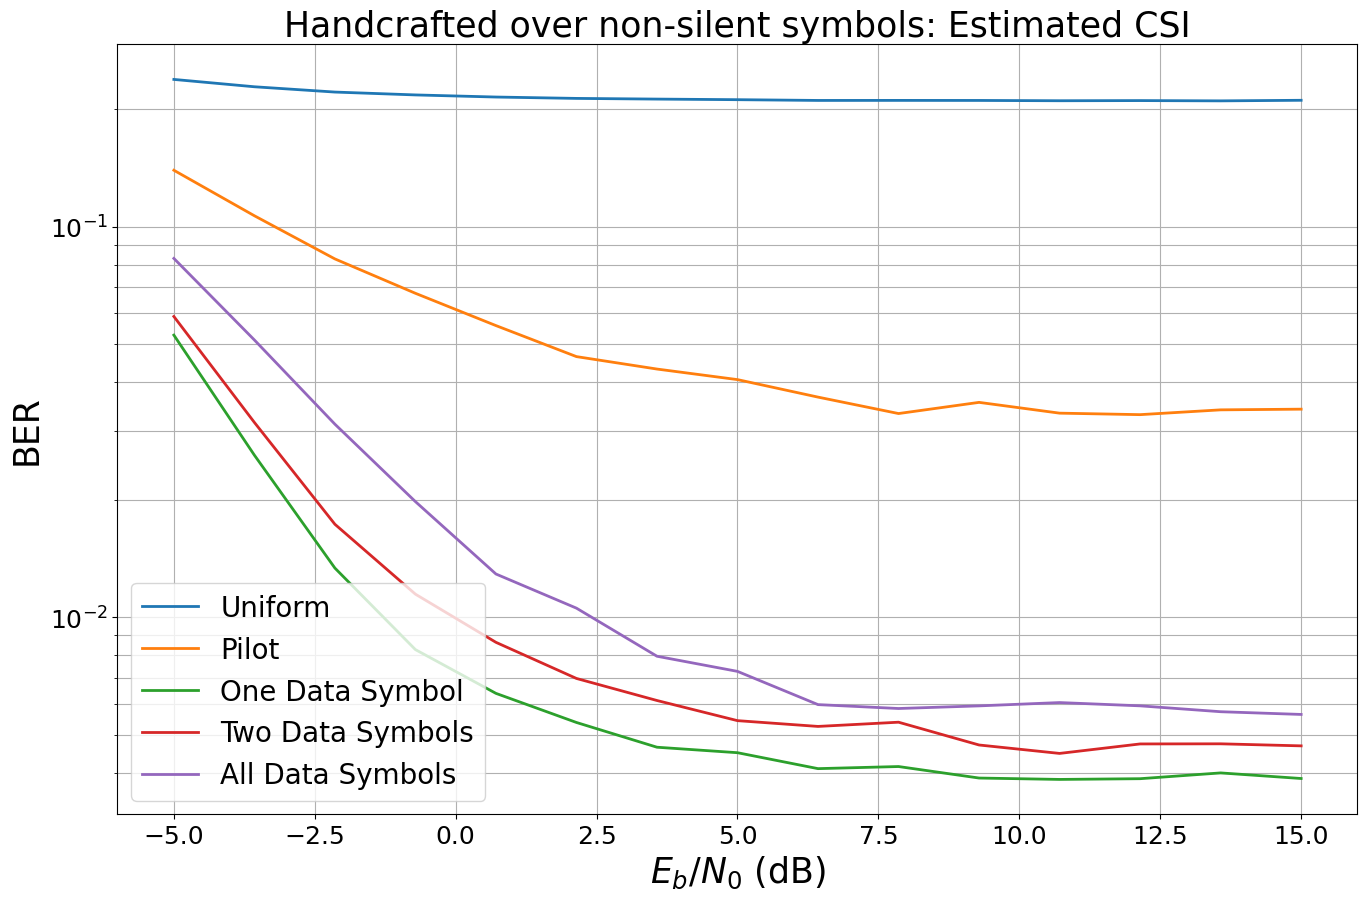

In [6]:
ber_plots.title = "Handcrafted over non-silent symbols: Estimated CSI"
ber_plots()